In [1]:
from Almanac.get_weather_data import get_weather_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df = get_weather_data('Chicago, IL, 60601, US','2018-01-01','2023-01-01')

<Axes: xlabel='time'>

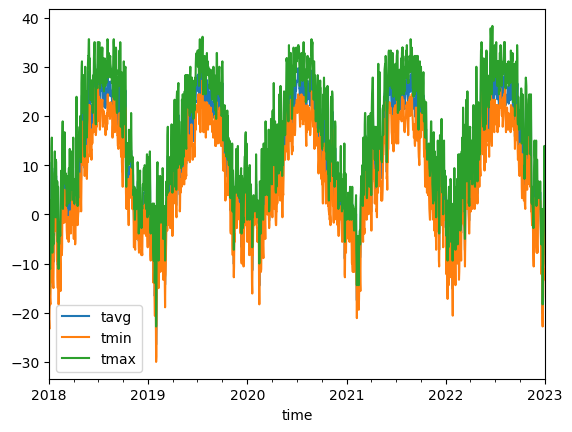

In [13]:
df.plot(y=['tavg','tmin','tmax'])

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
r = seasonal_decompose(df['tmin'],period=int(365/4),model='add')

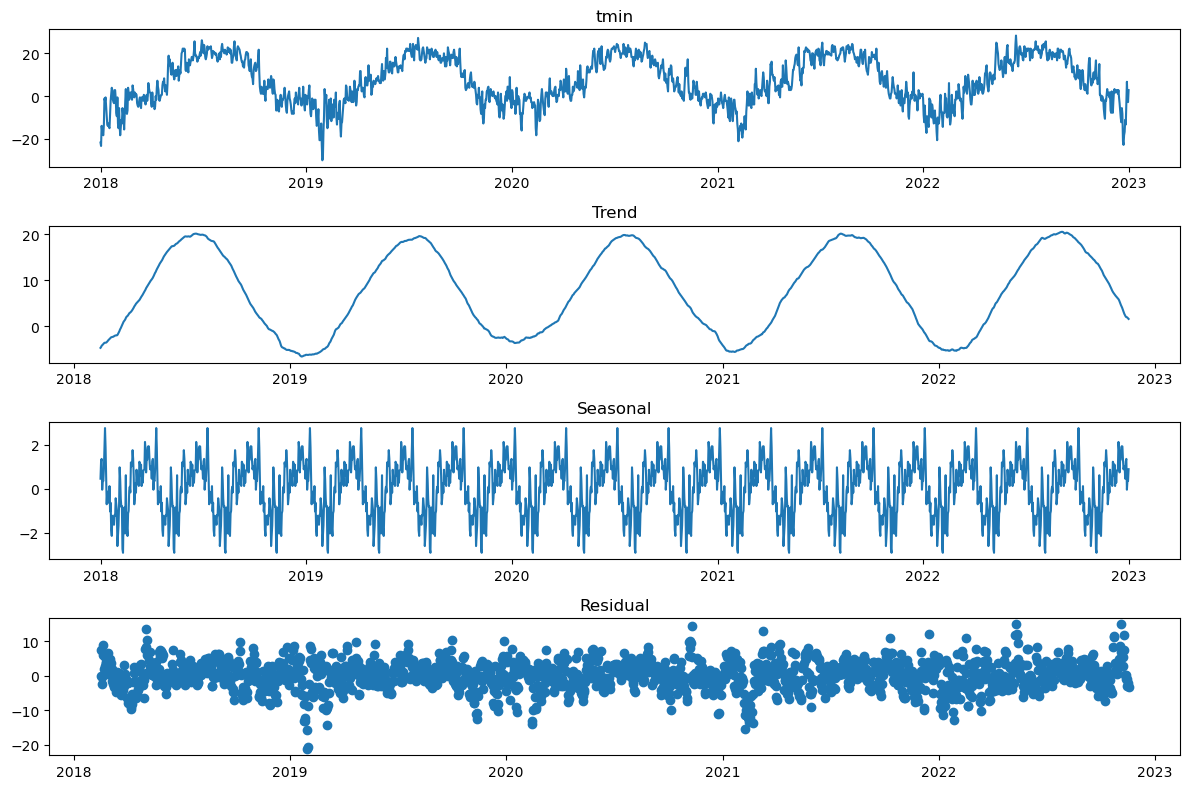

In [24]:
fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(12,8))
ax[0].plot(df['tmin'])
ax[1].plot(r.trend)
ax[2].plot(r.seasonal)
ax[3].scatter(x=r.resid.index,y=r.resid)

ax[0].set_title('tmin')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

fig.tight_layout()

In [7]:
r.resid.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
               '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30',
               '2022-12-31', '2023-01-01'],
              dtype='datetime64[ns]', name='time', length=731, freq='D')

In [8]:
(365**4)*6.25

110930628906.25

In [9]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [16]:
cyc,trend = hpfilter(df['tmin'],lamb=13322500)

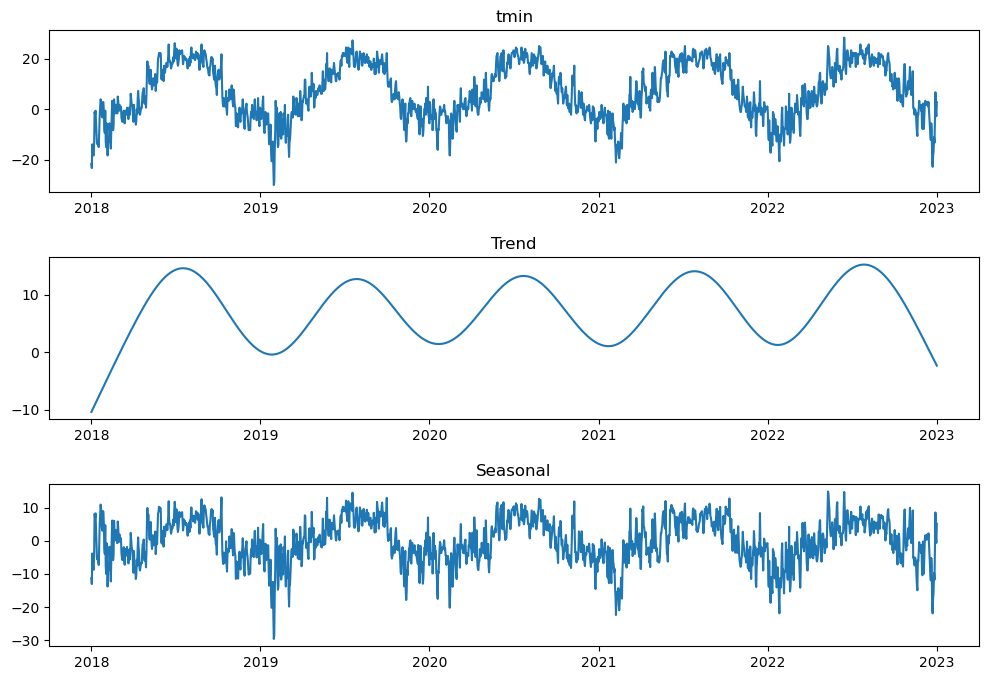

In [17]:
fig2,ax2 = plt.subplots(nrows=3,ncols=1,figsize=(12,8))
ax2[0].plot(df['tmin'])
ax2[1].plot(trend)
ax2[2].plot(cyc)

ax2[0].set_title('tmin')
ax2[1].set_title('Trend')
ax2[2].set_title('Seasonal')

plt.subplots_adjust(hspace=0.4)